Logistic Regression Accuracy: 0.7685087603741273
Random Forest Accuracy: 0.915722566196812


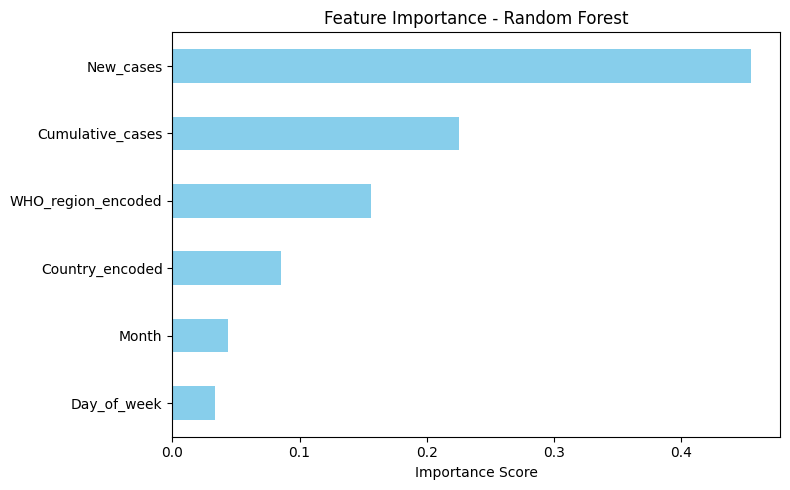

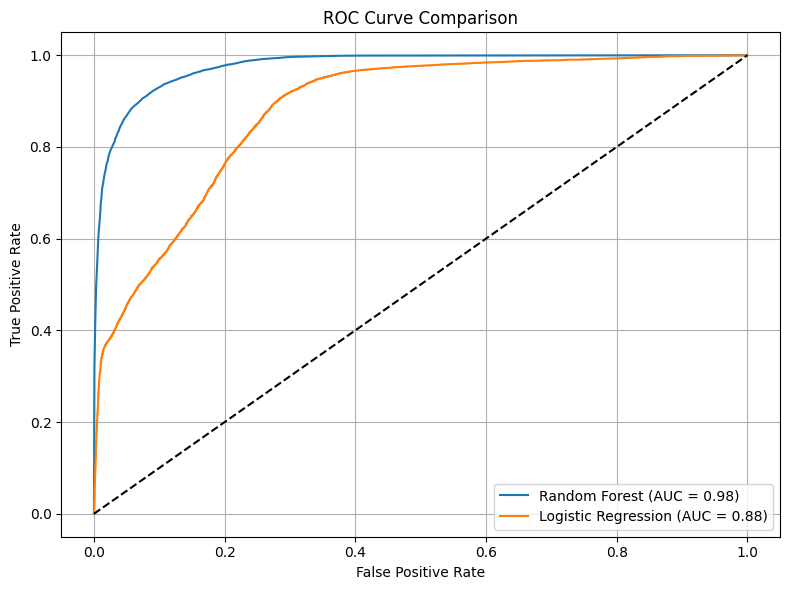

('random_forest_classification_report.csv',
 'logistic_regression_classification_report.csv')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix


# Load dataset
file_path = "WHO-COVID-19-global-daily-data.csv"
df = pd.read_csv(file_path)

# Drop rows with missing critical values
df = df.dropna(subset=['New_deaths', 'New_cases', 'Cumulative_cases', 'Country', 'WHO_region'])

# Convert Date to datetime
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

# Create binary outcome variable: 1 if New_deaths above median, else 0
median_deaths = df['New_deaths'].median()
df['High_death'] = (df['New_deaths'] > median_deaths).astype(int)

# Feature engineering
df['Month'] = df['Date_reported'].dt.month
df['Day_of_week'] = df['Date_reported'].dt.dayofweek

# Encode categorical variables
le_country = LabelEncoder()
df['Country_encoded'] = le_country.fit_transform(df['Country'])

le_region = LabelEncoder()
df['WHO_region_encoded'] = le_region.fit_transform(df['WHO_region'])

# Define features and target
features = ['Country_encoded', 'WHO_region_encoded', 'New_cases', 'Cumulative_cases', 'Month', 'Day_of_week']
X = df[features]
y = df['High_death']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Visualize feature importance from Random Forest
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(8, 5))
importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Confusion matrices and classification reports
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Export reports
report_rf_df = pd.DataFrame(report_rf).transpose()
report_lr_df = pd.DataFrame(report_lr).transpose()

report_rf_df.to_csv("random_forest_classification_report.csv")
report_lr_df.to_csv("logistic_regression_classification_report.csv")

"random_forest_classification_report.csv", "logistic_regression_classification_report.csv"


In [6]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,High_death,Month,Day_of_week,Country_encoded,WHO_region_encoded
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0,0,1,5,16,4
8,2020-01-04,CK,Cook Islands,WPR,0.0,0,0.0,0,0,1,5,46,5
15,2020-01-04,IN,India,SEAR,0.0,0,0.0,0,0,1,5,94,4
22,2020-01-04,NR,Nauru,WPR,0.0,0,0.0,0,0,1,5,142,5
28,2020-01-04,SB,Solomon Islands,WPR,0.0,0,0.0,0,0,1,5,191,5
